# Part 2 of Axis Scaling: Global Relative Scale Adjustment

This page is primarily based on the following page at the Circos documentation site:



- [2. Global Relative Scale Adjustment](????????????)



That page is found as part number 4 of the ??? part ['Axis Scaling' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 1 by clicking [here &#8592;](AxisScaling_Part1.ipynb).



----



7 --- Axis Scaling
==================

2. Global Relative Scale Adjustment
-----------------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/scaling/global_relative_scale/lesson){.clean}]{.active}
[Images](/documentation/tutorials/scaling/global_relative_scale/images){.normal}
[Configuration](/documentation/tutorials/scaling/global_relative_scale/configuration){.normal}
:::

In the previous tutorial, I showed how to adjust the magnification of
ideograms. There, you learned how to make an ideogram twice as large (or
twice as small), as others.

However, sometimes it is useful to change the size of an ideogram in an
image so that it fills a given fraction of the image. The first example
image shows the full human and mouse genome, and the second image limits
the display to human chromosomes 1, 2, 3 and mouse chromosomes 14-19. In
this image human chromosome occupies about 20% of the image.

### scaling ideograms relative to image

Now suppose you want to change the scale of human chromosome so that it
fills exactly a quarter of the image (25%). You could compute the
required magnification by requiring that

```ini
scale(hs1) * size(hs1) / size(all displayed ideograms) = 0.25
```


But there is a simpler way,

```ini
chromosomes_scale = hs1:0.25r
```


By using the `r` suffix on scale, you indicate that the scale is
relative to the circumference of the ideogram circle.

### scaling multiple ideograms individually relative to image

By using a regular expression you can adjust the scale of multiple
ideograms. When this is combined with relative scale, you can make each
ideogram have the same size on the image, regardless of its physical
size.

For example, this will make each of the 6 mouse chromosomes on the image
each occupy 10% of the image.

```ini
chromosomes_scale = /mm/:0.1r
```


You can mix relative and absolute scales, but be careful that your
relative scales don\'t add up to more than 1.0. For example,

```ini
chromosomes_scale = hs1:0.75r;hs2:0.75r
```


will have a strange effect because you\'ve asked that two ideograms each
occupy 3/4 of the image. Circos doesn\'t check the sanity of your scale
expressions.

### scaling multiple ideograms as a group relative to image

Now suppose you wanted all the mouse chromosomes to occupy 50% of the
image, as a group. You could to this by calculating the required
relative scale for each (e.g. 0.5/6 = 0.0833)

```ini
chromosomes_scale           = /mm/:0.0833r
```


But there\'s a better way. By using the `n` suffix, you indicate that
the fraction of the image should be divided evenly by the number of
ideograms that match the regular expression. Thus,

```ini
chromosomes_scale           = /mm/:0.5rn
```


scales all ideograms matching `/mm/` to occupy, as a group, 50% of the
image.

Note that in this method each ideogram has the same size in the image.

### application to multiple genomes

Consider the image in which three genomes are shown (human, mouse, rat).
The following limits the rat and mouse chromosomes to 1/4 of the image,
regardless how many ideograms from these genomes are shown.

```ini
chromosomes_color = /hs/:green;/mm/:red;/rn/:blue
chromosomes_scale = /mm/:0.25rn;/rn/:0.25rn
```


Note that in this method each rat and mouse ideogram has the same size
in the image.

::: {.issuebox}
The calculation behind these settings is iterative and sometimes has a
hard time correctly adjusting for ideogram spacing. You may need to
adjust the fractions to accomodate this inaccuracy. It\'s a shortcoming
of the code.
:::




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/7/2/

/home/jovyan/circos-tutorials-0.67/tutorials/7/2


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.36s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.36s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/7/2
debuggroup summary 0.36s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.36s loading configuration from file circos.conf
debuggroup summary 0.36s found conf file circos.conf
debuggroup summary 0.54s debug will appear for these features: output,summary
debuggroup summary 0.54s bitmap output image ./circos.png
debuggroup summary 0.54s SVG output image ./circos.svg
debuggroup summary 0.54s parsing karyotype and organizing ideograms
debuggroup summary 0.73s karyotype has 66 chromosomes of total size 8,540,079,869
debuggroup summary 0.74s applying global and local scaling
debuggroup summary 0.80s allocating image, colors and brushes
debuggroup summary 2.74s drawing 9 ideograms of total size 1,264,747,606
debuggroup summary 2.74s drawing highlights and ideograms
debuggroup outpu

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

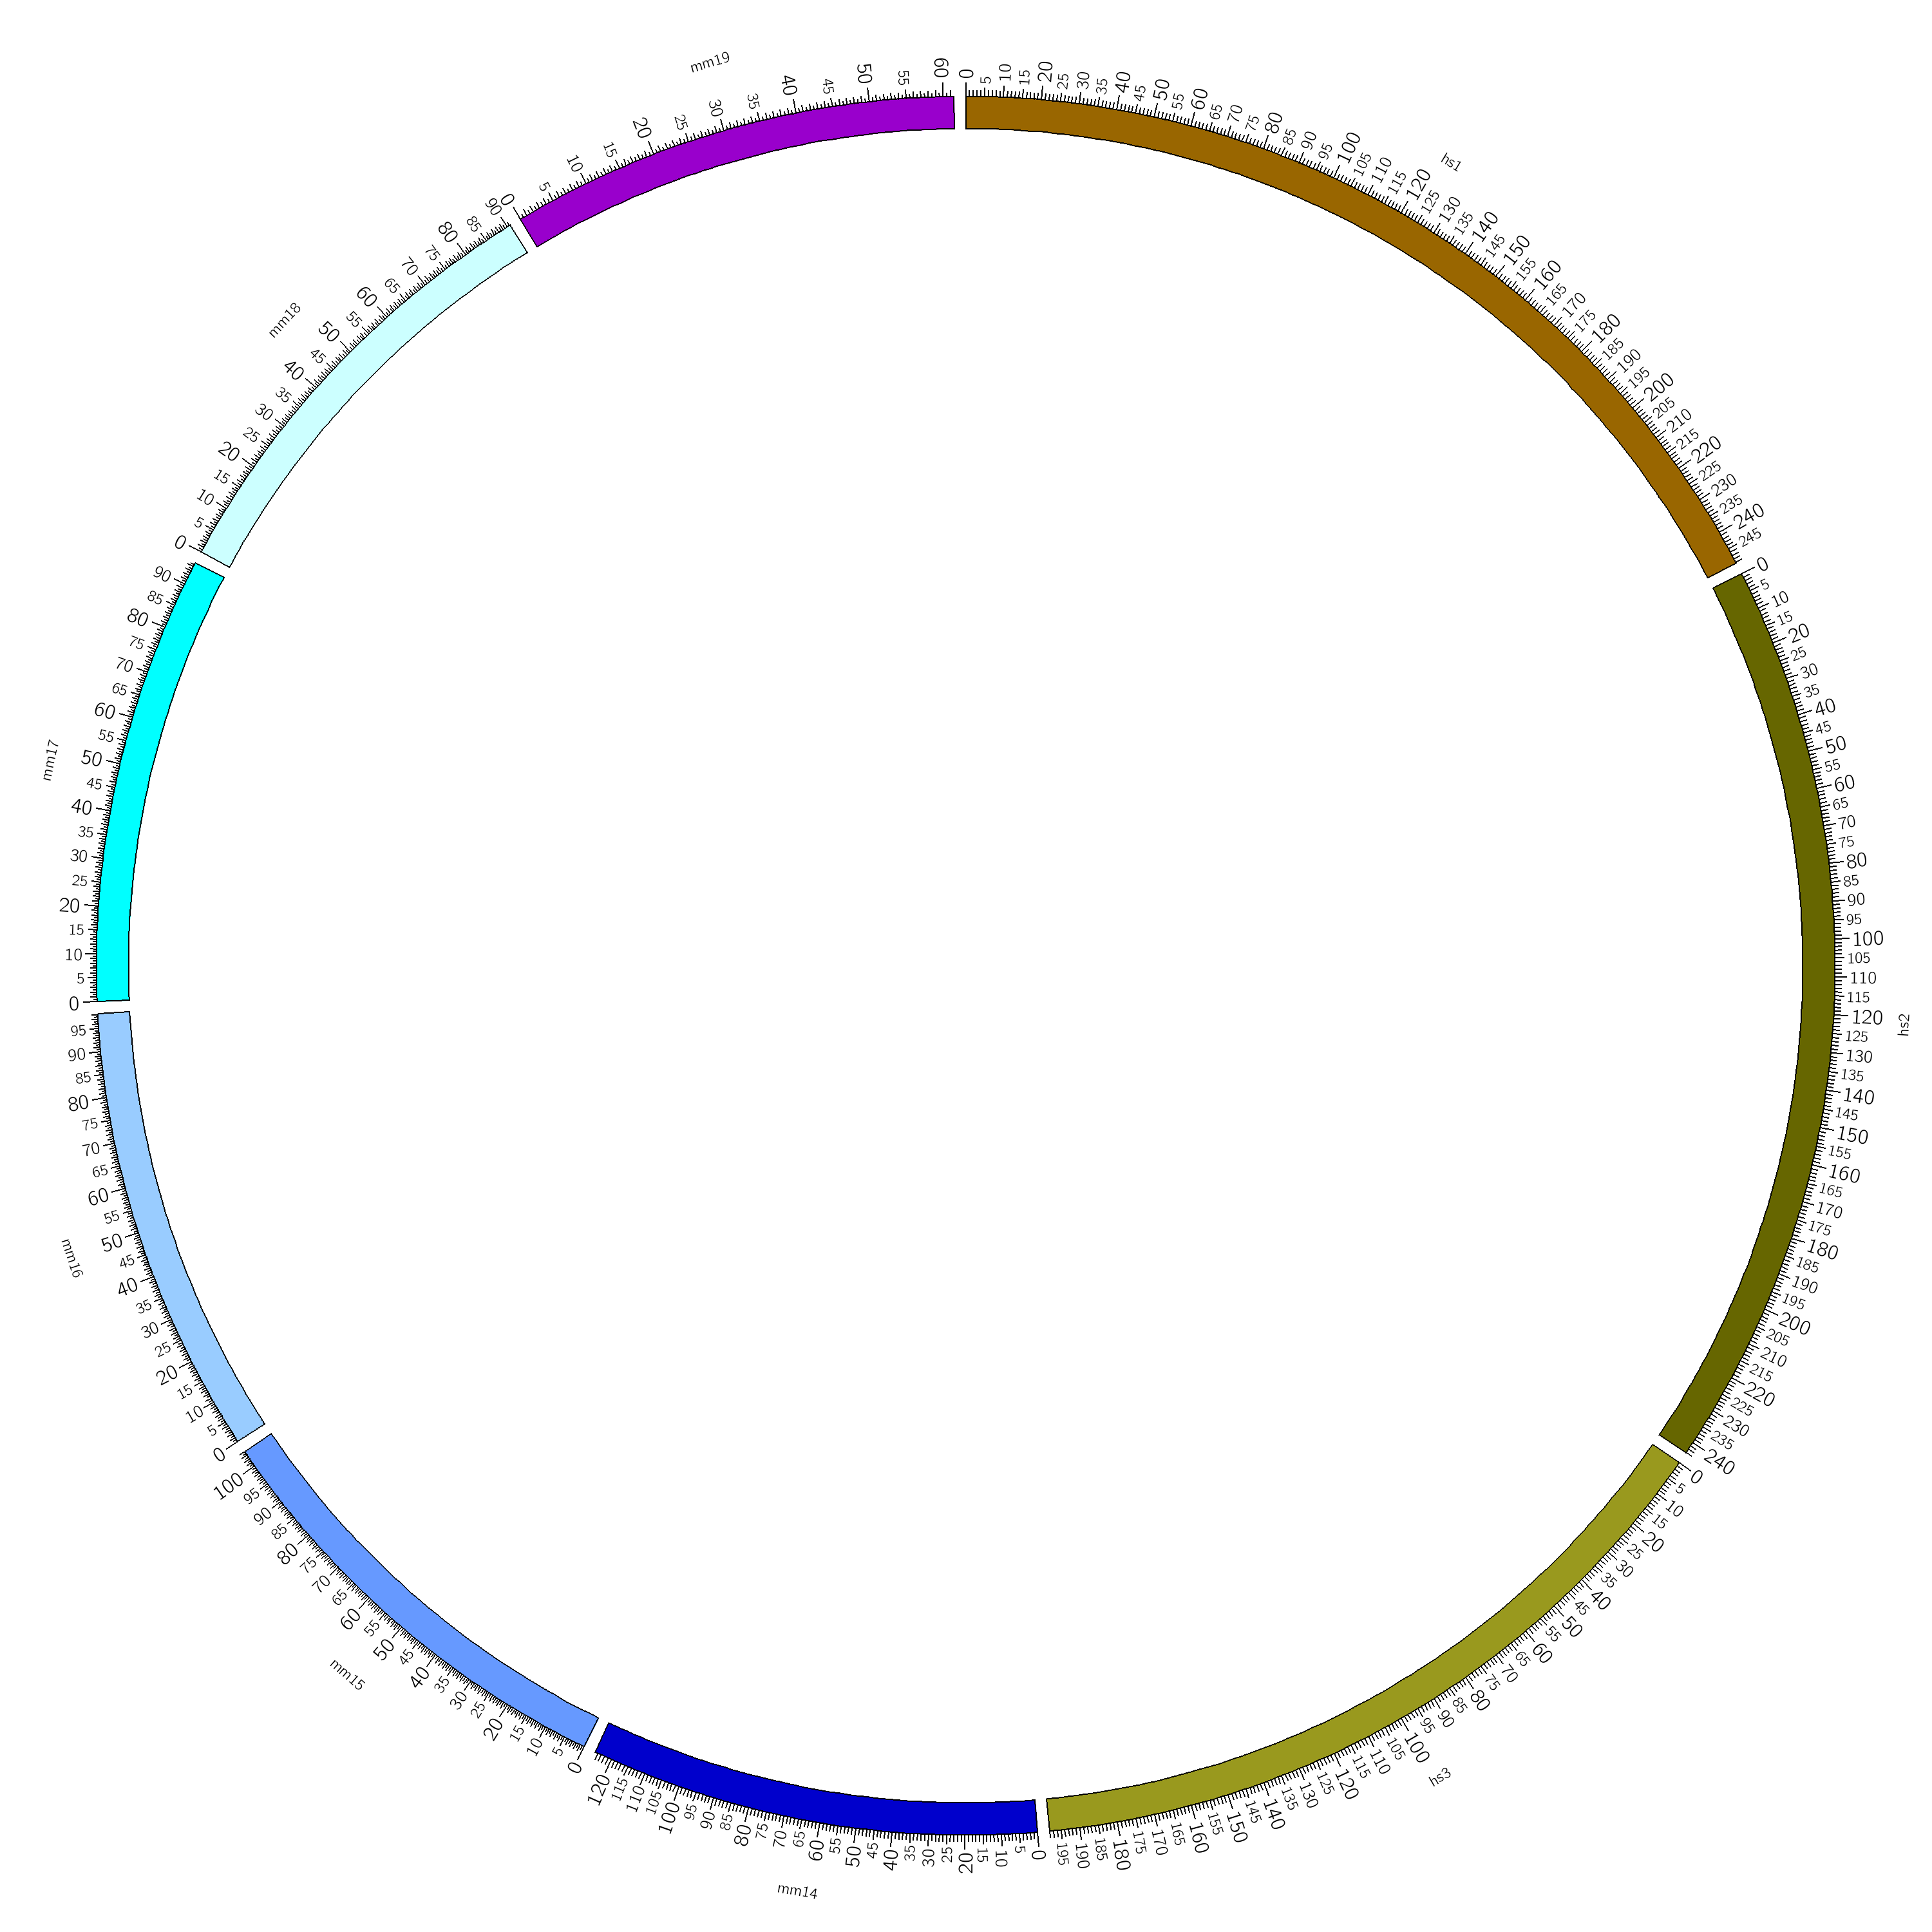

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Axis Scaling series by clicking [here &#10145;](AxisScaling_Part3.ipynb).

----